# Exercise 06.1

In this exercise we use what we learnt about the Metropolis Monte Carlo algorithm to simulate a physical system: 1D Ising model with periodic boundary conditions. 
$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$
where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$ such that $s_{N+1} = s_{1}$. In the present simulations we will consider a ferromagnetic Ising model of $N=50$ spins with nearest neighbors interaction given by a coupling $J=1$.

A Monte Carlo step consists in trying to flip one time all the spins of the system.
We treat our system in the canonical ensemble and we sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$ in two different ways:
- **Metropolis sampling algorithm.** We try to flip all the spins of the system with uniform probability and we accept the move with probability $A(\mu|\nu)=min[1,e^{-\beta \Delta E}]$ where $\mu, \nu$ represent configurations of the system and $\Delta E = H(\mu)-H(\nu)$.
- **Gibbs sampling algorithm.** This is a particular case of the Metropolis algorithm where the proposed move is always accepted. We are dealing with a Markov chain that is built from a set of base transition probabilities $$T_k(\mu|\nu)=p_{1|N-1}(\mu_k|\{ \nu_i : i \neq k \}) \prod_{i \neq k} \delta (\mu_i - \nu_i)$$
where $\mu_j$ and $\nu_j$ represent the j-th spin of the configuration $\mu$ or $\nu$.
So $T_k$ leaves all the spins except $\nu_k$ unchanged and draws a new $\mu_k$ from its distribution conditional on the current values of all other spins. For the 1D Ising model the conditional probability is $$p(\mu_k|\{ \nu_i : i \neq k \})= \frac{1}{1+ e^{-\beta \Delta E}}$$


We have to implement the calculation of $M(N,T,h)$, $C(N,T)$, $\chi(N,T)$. The useful formulas to do this in a Monte Carlo simulation are:
- $M(N,T,h) = \left\langle \sum_{i=1,N}s_i \right\rangle $
- $C(N,T)=k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)$
- $\chi(N,T) = \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right]$ 

Indeed at each MC step we can calculate the actual energy and magnetization of the system. These measurements are enough to calculate the quantities above.

The goal of the exercise is to compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$.

In order to do this we prepared a bash script that executes the program many times at different temperatures $T \in [0.5;2.0]$ contained in file *temp.txt*. Our simulations work with $20$ blocks of $10^4$ measurements each.

In [59]:
#for i in $(cat temp.txt)
#do
#  sed -ie "8s/.*/0/" input.dat
#  sed -ie "1s/.*/${i}/" input.dat
#  ./Monte_Carlo_ISING_1D.exe
#  sed -ie "8s/.*/1/" input.dat
#  ./Monte_Carlo_ISING_1D.exe
#done

Each time the script changes the input temperature and set the restart variable to $0$. Then executes the program with $2 \cdot 10^5$ MC step to equilibrate the simulation. It is not necessary to do so many MC step in order to equilibrate, but this doesn't require much computational time, so let's use brute force. After the equilibration the script set the restart variable to $1$: the program is ready to make measurements at the given temperature. The code saves data only if $restart=1$.

We have to run this script for both Gibbs and Metropolis sampling algorithms. If we run the script with $h=0$ we will obtain a file *UCXofT.txt* which contains the temperature dependence of $U$, $C$ and $\chi$ while if we run it with $h = 0.02$ we will obtain a file *MofT.txt* which contains the temperature dependence of $M$.

We show below the results of our simulations compared to theoretical predictions. Data fit extremely well the predictions for both the sampling algorithms used.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

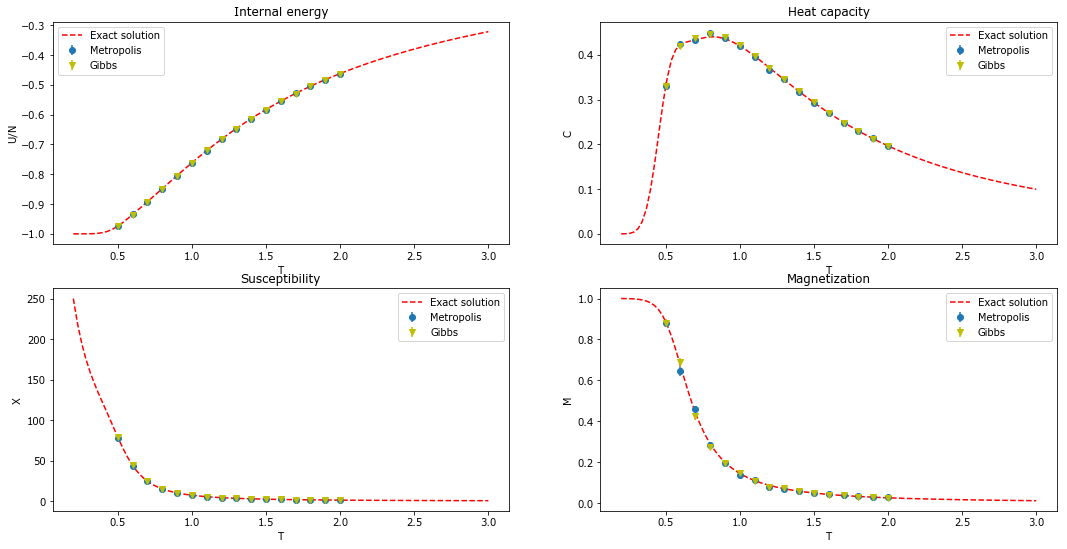

In [56]:
temp, ene_M, err_ene_M = np.loadtxt("Ex_06.1/Metropolis/Metro_UCXofT.txt",usecols=(0,1,2), delimiter='\t', unpack='true')
ene_G, err_ene_G = np.loadtxt("Ex_06.1/Gibbs/Gibbs_UCXofT.txt",usecols=(1,2), delimiter='\t', unpack='true')

f, axarr = plt.subplots(2,2, figsize=(18,9))

axarr[0,0].errorbar(temp, ene_M, yerr=err_ene_M, fmt='o', label='Metropolis')
axarr[0,0].errorbar(temp, ene_G, yerr=err_ene_G, fmt='v', color='y', label='Gibbs')
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
axarr[0,0].plot(T, e, linestyle='--', color='r', label='Exact solution')
#axarr[1].plot(T, e, color='r', label='Exact solution')
axarr[0,0].set(title='Internal energy')
axarr[0,0].set(xlabel='T')
axarr[0,0].set(ylabel='U/N')
axarr[0,0].legend()

heat_M, err_heat_M = np.loadtxt("Ex_06.1/Metropolis/Metro_UCXofT.txt",usecols=(3,4), delimiter='\t', unpack='true')
heat_G, err_heat_G = np.loadtxt("Ex_06.1/Gibbs/Gibbs_UCXofT.txt",usecols=(3,4), delimiter='\t', unpack='true')

axarr[0,1].errorbar(temp, heat_M, yerr=err_heat_M, fmt='o', label='Metropolis')
axarr[0,1].errorbar(temp, heat_G, yerr=err_heat_G, fmt='v', color='y', label='Gibbs')

heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
axarr[0,1].plot(T, heat, linestyle='--', c='r', label='Exact solution')
axarr[0,1].set(title='Heat capacity')
axarr[0,1].set(xlabel='T')
axarr[0,1].set(ylabel='C')
axarr[0,1].legend()

chi_M, err_chi_M = np.loadtxt("Ex_06.1/Metropolis/Metro_UCXofT.txt",usecols=(5,6), delimiter='\t', unpack='true')
chi_G, err_chi_G = np.loadtxt("Ex_06.1/Gibbs/Gibbs_UCXofT.txt",usecols=(5,6), delimiter='\t', unpack='true')

axarr[1,0].errorbar(temp, chi_M, yerr=err_chi_M, fmt='o', label='Metropolis')
axarr[1,0].errorbar(temp, chi_G, yerr=err_chi_G, fmt='v', color='y', label='Gibbs')

X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
axarr[1,0].plot(T, X, linestyle='--', c='r', label='Exact solution')
axarr[1,0].set(title='Susceptibility')
axarr[1,0].set(xlabel='T')
axarr[1,0].set(ylabel='X')
axarr[1,0].legend()

mag_M, err_mag_M = np.loadtxt("Ex_06.1/Metropolis/Metro_MofT.txt",usecols=(1,2), delimiter='\t', unpack='true')
mag_G, err_mag_G = np.loadtxt("Ex_06.1/Gibbs/Gibbs_MofT.txt",usecols=(1,2), delimiter='\t', unpack='true')

axarr[1,1].errorbar(temp, mag_M, yerr=err_mag_M, fmt='o', label='Metropolis')
axarr[1,1].errorbar(temp, mag_G, yerr=err_mag_G, fmt='v', color='y', label='Gibbs')

h=0.02 #external field
b = 1/T
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

axarr[1,1].plot(T, M, linestyle='--', c='r', label='Exact solution')
axarr[1,1].set(title='Magnetization')
axarr[1,1].set(xlabel='T')
axarr[1,1].set(ylabel='M')
axarr[1,1].legend()

plt.show()